In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
# from mpl_toolkits.basemap import Basemap

%matplotlib inline

C:\Users\Amit Kumar\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [26]:
df7 = pd.read_csv(r"C:\Users\Amit Kumar\Desktop\Files\gfw-carrier.csv")
df7.head()

,start,end,latitude,longitude,type,vessel.name,vessel.flag,vessel.ssvid,vessel.type,encounter.vessel.name,encounter.vessel.flag,encounter.vessel.ssvid,encounter.vessel.type,encounter.medianDistanceKilometers,encounter.medianSpeedKnots,encounter.authorized,encounter.authorizationStatus
0,2017-01-01T00:50:00.000Z,2017-01-01T04:30:00.000Z,-17.478285,-130.728523,encounter,SHUN TIAN FA 168,TAI,416602000,carrier,JIN HSIANG FA,TAI,416077500,fishing,0.016,1.067,False,partially
1,2017-01-01T01:10:00.000Z,2017-01-01T04:20:00.000Z,-2.509111,159.858066,encounter,SUN FLOWER 7,KOR,441034000,carrier,LIM DISCOVERER,KOR,440104000,fishing,0.358,0.400,True,authorized
2,2017-01-01T05:00:00.000Z,2017-01-01T07:10:00.000Z,-3.923760,-176.237759,encounter,HOUTA MARU,VUT,576285000,carrier,MARORAOI,KIR,529687000,fishing,0.404,1.459,True,authorized
3,2017-01-01T06:20:00.000Z,2017-01-01T13:50:00.000Z,56.230916,146.653282,encounter,FROST OLYMPOS,RUS,273311610,carrier,ARDATOV,RUS,273449170,fishing,0.040,0.843,False,unmatched
4,2017-01-01T06:30:00.000Z,2017-01-01T20:50:00.000Z,58.963889,153.531367,encounter,TAVRIA,RUS,273359920,carrier,VLADIMIR BABICH,RUS,273842020,fishing,0.166,1.101,False,unmatched


In [27]:
df7.drop_duplicates(subset='vessel.ssvid', keep='first', inplace=True)

In [28]:
import datetime
def convertDate(d):
     new_date = datetime.datetime.strptime(d,"%Y-%m-%dT%H:%M:%S.%fZ")
     return new_date.date()
convertDate("2017-01-01T06:30:00.000Z")
def convertTime(d):
     new_date = datetime.datetime.strptime(d,"%Y-%m-%dT%H:%M:%S.%fZ")
     return new_date.time()
convertDate("2017-01-01T06:30:00.000Z")

datetime.date(2017, 1, 1)

In [33]:
df7['year'] = df7['start'].apply(convertDate)
df7['time'] = df7['start'].apply(convertTime)
df7.head()

,start,end,latitude,longitude,type,vessel.name,vessel.flag,vessel.ssvid,vessel.type,encounter.vessel.name,encounter.vessel.flag,encounter.vessel.ssvid,encounter.vessel.type,encounter.medianDistanceKilometers,encounter.medianSpeedKnots,encounter.authorized,encounter.authorizationStatus,timestamp,year,time
0,2017-01-01T00:50:00.000Z,2017-01-01T04:30:00.000Z,-17.478285,-130.728523,encounter,SHUN TIAN FA 168,TAI,416602000,carrier,JIN HSIANG FA,TAI,416077500,fishing,0.016,1.067,False,partially,2017-01-01,2017-01-01,00:50:00
1,2017-01-01T01:10:00.000Z,2017-01-01T04:20:00.000Z,-2.509111,159.858066,encounter,SUN FLOWER 7,KOR,441034000,carrier,LIM DISCOVERER,KOR,440104000,fishing,0.358,0.400,True,authorized,2017-01-01,2017-01-01,01:10:00
2,2017-01-01T05:00:00.000Z,2017-01-01T07:10:00.000Z,-3.923760,-176.237759,encounter,HOUTA MARU,VUT,576285000,carrier,MARORAOI,KIR,529687000,fishing,0.404,1.459,True,authorized,2017-01-01,2017-01-01,05:00:00
3,2017-01-01T06:20:00.000Z,2017-01-01T13:50:00.000Z,56.230916,146.653282,encounter,FROST OLYMPOS,RUS,273311610,carrier,ARDATOV,RUS,273449170,fishing,0.040,0.843,False,unmatched,2017-01-01,2017-01-01,06:20:00
4,2017-01-01T06:30:00.000Z,2017-01-01T20:50:00.000Z,58.963889,153.531367,encounter,TAVRIA,RUS,273359920,carrier,VLADIMIR BABICH,RUS,273842020,fishing,0.166,1.101,False,unmatched,2017-01-01,2017-01-01,06:30:00


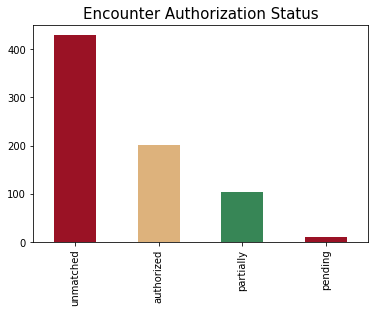

In [34]:
df7['encounter.authorizationStatus'].value_counts().plot(kind='bar', color=['#9A1225', '#DDB27C', '#378656'])
plt.title("Encounter Authorization Status", fontsize=15)
plt.show()

In [35]:
def count_unknown(s):
    if s == 'NA':
        return 0
    else:
        return len(str(s).split('|'))

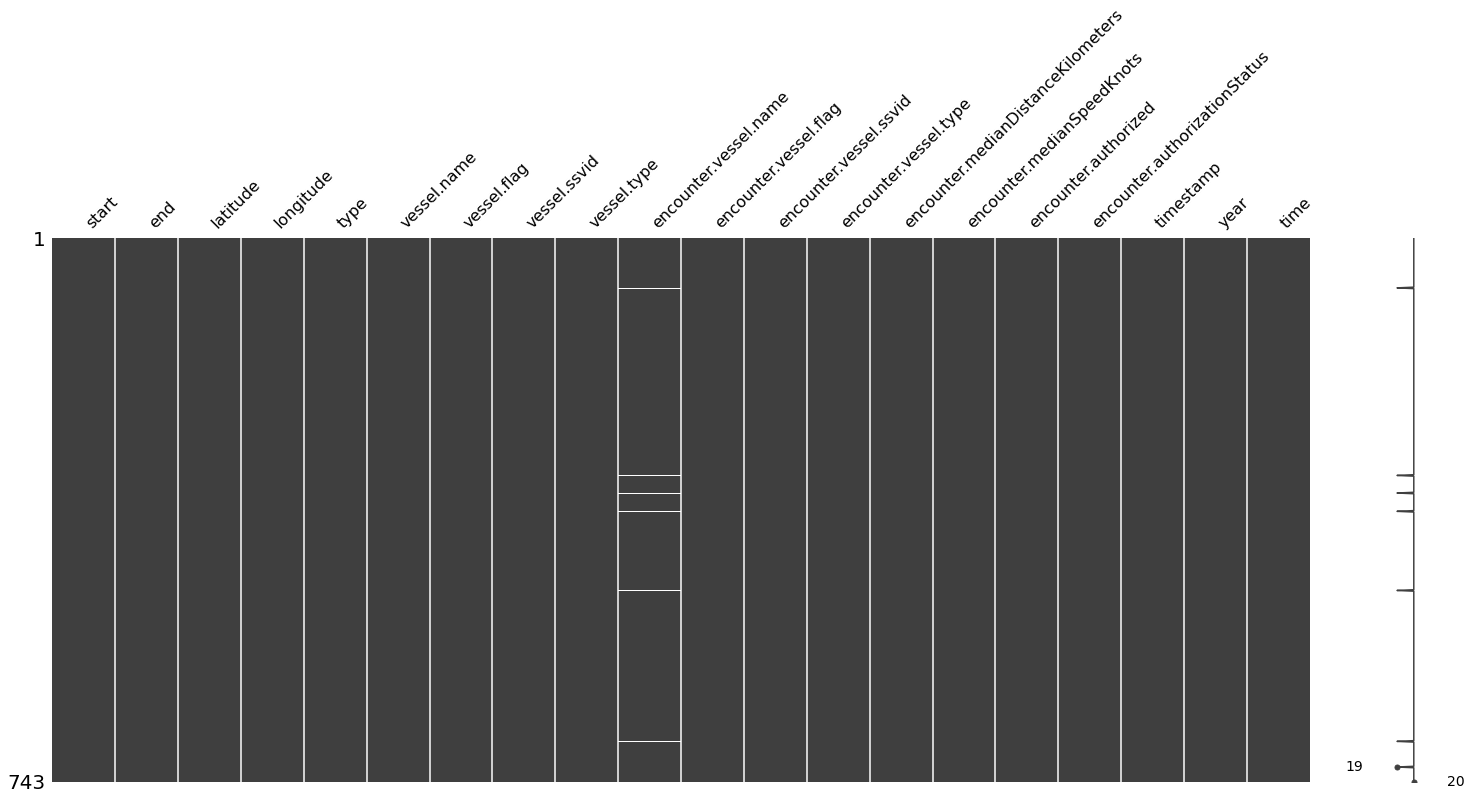

In [38]:
msno.matrix(df7)

In [75]:
df7['start'] = pd.to_datetime(df7['start'], unit = 's')
df7['end'] = pd.to_datetime(df7['end'],unit = 's')
df7['duration'] = (df7['end'] - df7['start']).dt.seconds /60

In [56]:
df7.head()

,start,end,latitude,longitude,type,vessel.name,vessel.flag,vessel.ssvid,vessel.type,encounter.vessel.name,...,encounter.vessel.type,encounter.medianDistanceKilometers,encounter.medianSpeedKnots,encounter.authorized,encounter.authorizationStatus,timestamp,year,time,duration,is_authorized
0,2017-01-01 00:50:00+00:00,2017-01-01 04:30:00+00:00,-17.478285,-130.728523,encounter,SHUN TIAN FA 168,TAI,416602000,carrier,JIN HSIANG FA,...,fishing,0.016,1.067,False,partially,2017-01-01,2017-01-01,00:50:00,220.0,0
1,2017-01-01 01:10:00+00:00,2017-01-01 04:20:00+00:00,-2.509111,159.858066,encounter,SUN FLOWER 7,KOR,441034000,carrier,LIM DISCOVERER,...,fishing,0.358,0.400,True,authorized,2017-01-01,2017-01-01,01:10:00,190.0,2
2,2017-01-01 05:00:00+00:00,2017-01-01 07:10:00+00:00,-3.923760,-176.237759,encounter,HOUTA MARU,VUT,576285000,carrier,MARORAOI,...,fishing,0.404,1.459,True,authorized,2017-01-01,2017-01-01,05:00:00,130.0,2
3,2017-01-01 06:20:00+00:00,2017-01-01 13:50:00+00:00,56.230916,146.653282,encounter,FROST OLYMPOS,RUS,273311610,carrier,ARDATOV,...,fishing,0.040,0.843,False,unmatched,2017-01-01,2017-01-01,06:20:00,450.0,0
4,2017-01-01 06:30:00+00:00,2017-01-01 20:50:00+00:00,58.963889,153.531367,encounter,TAVRIA,RUS,273359920,carrier,VLADIMIR BABICH,...,fishing,0.166,1.101,False,unmatched,2017-01-01,2017-01-01,06:30:00,860.0,0


In [57]:
df7['is_authorized'] = df7['encounter.authorizationStatus'].apply(lambda x: 2 if x == 'authorized' else (1 if x == 'partial' else 0))

In [58]:
df7.shape

(743, 22)

,start,end,latitude,longitude,type,vessel.name,vessel.flag,vessel.ssvid,vessel.type,encounter.vessel.name,...,encounter.vessel.type,encounter.medianDistanceKilometers,encounter.medianSpeedKnots,encounter.authorized,encounter.authorizationStatus,timestamp,year,time,duration,is_authorized
0,2017-01-01 00:50:00+00:00,2017-01-01 04:30:00+00:00,-17.478285,-130.728523,encounter,SHUN TIAN FA 168,TAI,416602000,carrier,JIN HSIANG FA,...,fishing,0.016,1.067,False,partially,2017-01-01,2017-01-01,00:50:00,220.0,0
1,2017-01-01 01:10:00+00:00,2017-01-01 04:20:00+00:00,-2.509111,159.858066,encounter,SUN FLOWER 7,KOR,441034000,carrier,LIM DISCOVERER,...,fishing,0.358,0.400,True,authorized,2017-01-01,2017-01-01,01:10:00,190.0,2
2,2017-01-01 05:00:00+00:00,2017-01-01 07:10:00+00:00,-3.923760,-176.237759,encounter,HOUTA MARU,VUT,576285000,carrier,MARORAOI,...,fishing,0.404,1.459,True,authorized,2017-01-01,2017-01-01,05:00:00,130.0,2
3,2017-01-01 06:20:00+00:00,2017-01-01 13:50:00+00:00,56.230916,146.653282,encounter,FROST OLYMPOS,RUS,273311610,carrier,ARDATOV,...,fishing,0.040,0.843,False,unmatched,2017-01-01,2017-01-01,06:20:00,450.0,0
4,2017-01-01 06:30:00+00:00,2017-01-01 20:50:00+00:00,58.963889,153.531367,encounter,TAVRIA,RUS,273359920,carrier,VLADIMIR BABICH,...,fishing,0.166,1.101,False,unmatched,2017-01-01,2017-01-01,06:30:00,860.0,0


In [69]:
from sklearn.model_selection import train_test_split
# Import train_test_split function
X = df7[['encounter.medianSpeedKnots', 'vessel.ssvid', 'latitude', 'longitude']]  # Features
X = (X - X.mean()) / X.std() # Normalize the features
y = df7['is_authorized']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4) # 70% training and 30% test

In [70]:
X.head()

,encounter.medianSpeedKnots,vessel.ssvid,latitude,longitude
0,0.728800,0.366673,-1.056213,-1.386876
1,-0.451170,0.584543,-0.657936,1.036076
2,1.422275,1.790626,-0.695575,-1.766338
3,0.332528,-0.911101,0.904929,0.925973
4,0.788948,-0.910670,0.977644,0.983323


In [79]:
df7.is_authorized.value_counts()

0    542
2    201
Name: is_authorized, dtype: int64

In [80]:
import warnings
warnings.filterwarnings('ignore')

In [81]:
# Import Logistic Regression
from sklearn.linear_model import LogisticRegression

# Create a Gaussian Classifier
log_reg_nom = LogisticRegression( random_state=2021).fit(X_train, y_train)

# Train the model using the training sets
log_reg_nom.fit(X_train, y_train)
y_pred = log_reg_nom.predict(X_test)
print(f"Accuracy = {log_reg_nom.score(X_test, y_test)}")

Accuracy = 0.7248322147651006


In [82]:
#KNN
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=10)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [83]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8523489932885906


In [85]:
from sklearn.ensemble import RandomForestClassifier
#Random Forest Classifier
# Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

# Train the model using the training sets
clf.fit(X_train,y_train)
# Predict the response for test dataset
y_pred=clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print(f"Accuracy = {clf.score(X_test, y_test)}")

Accuracy = 0.8926174496644296


In [88]:
import pickle
pickle.dump(log_reg_nom, open('linear.pkl','wb'))
pickle.dump(knn, open('knn.pkl','wb'))
pickle.dump(clf, open('rndf.pkl','wb'))

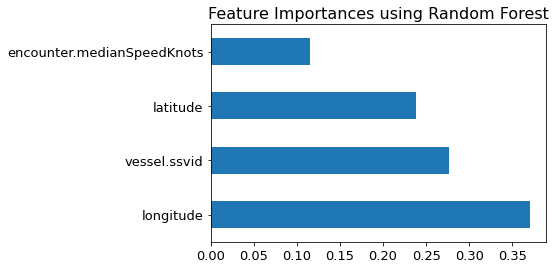

In [89]:
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp.plot(kind='barh', fontsize=13)
plt.title('Feature Importances using Random Forest', fontsize=16)
plt.show()
